In [12]:
# coding：utf-8
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN

In [13]:
data = pd.read_csv(r"digit recognizor.csv")

In [14]:
X = data.iloc[:,1:] #data
y = data.iloc[:,0] #tag

In [15]:
#p=X[0:1] #这里是测试一下数据是否正常
#p
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


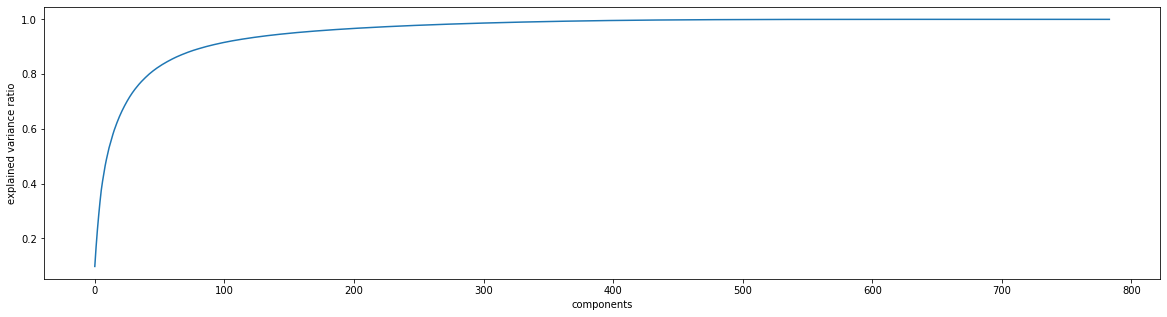

In [17]:
pca_graph = PCA().fit(X) #这里用pca检查合适的特征保留个数,这里是第一次粗略查找
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_graph.explained_variance_ratio_))
plt.xlabel("components")
plt.ylabel("explained variance ratio")
plt.show()   #用pca降维之后显著提升了KNN的效率，当然其他模型效率也有提升

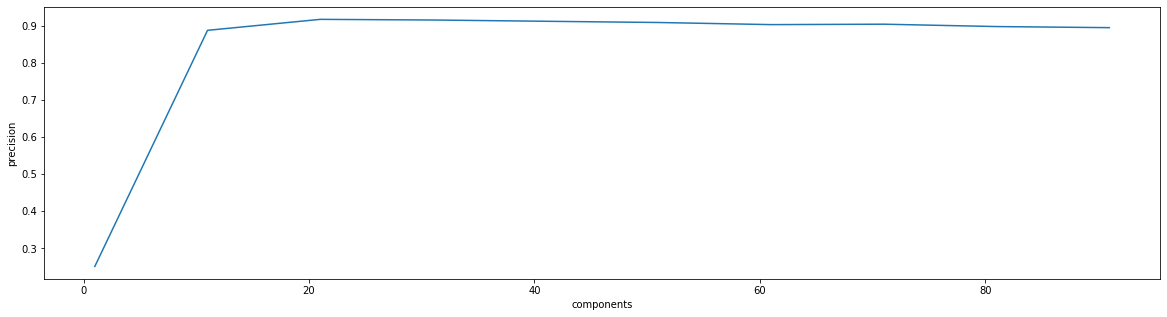

In [18]:
score_graph = [] #这里用pca检查合适的特征保留个数,这里是第一次精确查找
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    case = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()#使用随机森林算法,超参数n取10
    score_graph.append(case)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score_graph)
plt.xlabel("components")
plt.ylabel("precision")
plt.show()

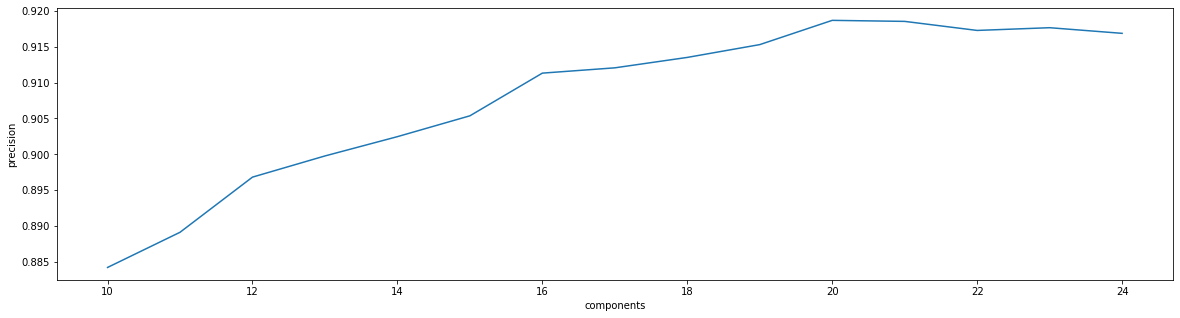

In [19]:
score_graph = [] #这里用pca检查合适的特征保留个数,这里是第二次精确查找
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    case = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()#使用随机森林算法,超参数n取10
    score_graph.append(case)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score_graph)
plt.xlabel("components")
plt.ylabel("precision")
plt.show()

In [20]:
pca1 = PCA(23)
X_dr = pca1.fit_transform(X) #这里pca的参数取上图中精确度最高的点
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.946381243880103

In [8]:
X_dr

array([[-6.61595780e+02, -6.99311328e+02,  1.83282040e+02, ...,
         4.58073097e+01, -2.21402504e+02,  5.77268146e+01],
       [ 1.70145168e+03, -3.60551557e+02, -5.01805592e+02, ...,
        -2.12583273e+02,  2.71520044e+02,  6.25707637e+00],
       [-8.86894434e+02, -2.93765782e+02,  6.71553122e+01, ...,
        -1.03250617e+02, -1.31873243e+02,  1.49587967e+02],
       ...,
       [ 3.36269982e+02,  9.50015281e+02, -1.68605418e+02, ...,
        -2.31845443e+02,  1.19603089e+00,  1.55986896e+02],
       [ 3.27399392e+02,  6.20160914e+01,  6.97536392e+02, ...,
        -1.36211322e+02,  2.06663427e+02,  1.58196394e+02],
       [-3.64249200e+02,  4.18893026e+02,  6.28998206e+01, ...,
         3.52099614e+01,  4.37522868e+02, -5.53368149e+01]])

In [9]:
X_dr.shape #检查X_dr

(42000, 23)

In [20]:
cross_val_score(KNN(),X_dr,y,cv=5).mean() #使用KNN算法，超参数取默认值,这里我最高跑到了97.05%的精确值，之前都没那么高，因为pca和KNN算法是具有随机性的

0.9705232236355392

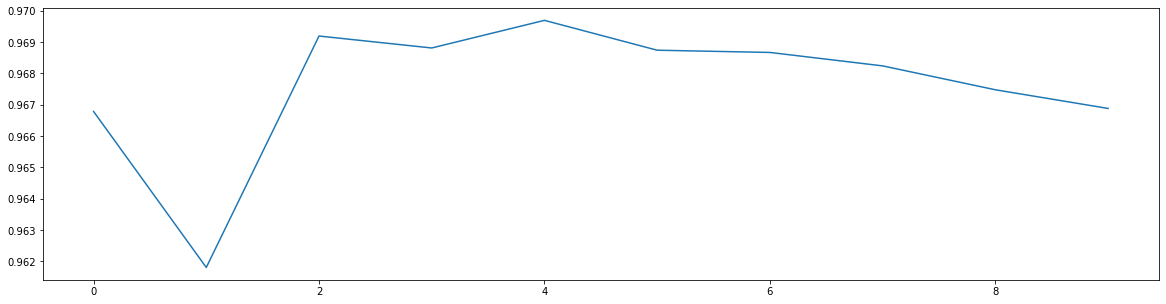

In [22]:
score_graph = [] #使用KNN算法，查找超参数最优取值
for i in range(10):
    X_dr = PCA(23).fit_transform(X)
    case = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score_graph.append(case)
plt.figure(figsize=[20,5])
plt.plot(range(10),score_graph)
plt.show()

In [25]:
rfc = RFC(n_estimators=100,random_state=0) #这里最终选了随机森林算法，因为我懒得再搞KNN了，虽然KNN精确度似乎高了几个百分点，但是我懒

In [26]:
rfc.fit(X_dr,y) #训练

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
prediction=rfc.predict(X_dr[0:10]) #这里是预测

NameError: name 'rfc' is not defined

In [83]:
y[0:20] #这里是正解

0     1
1     0
2     1
3     4
4     0
5     0
6     7
7     3
8     5
9     3
10    8
11    9
12    1
13    3
14    3
15    1
16    2
17    0
18    7
19    5
Name: label, dtype: int64

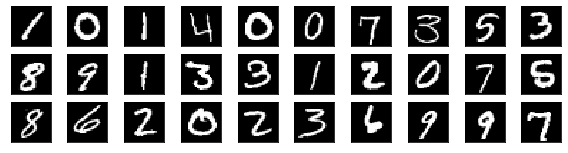

[1 0 1 4 0 0 7 3 5 3]
[8 9 1 3 3 1 2 0 7 5]
[8 6 2 0 2 3 6 9 9 7]


In [28]:
fig, ax = plt.subplots(3,10,figsize=(10,2.5),subplot_kw={"xticks":[],"yticks":[]})
X1=X.values.reshape(X.shape[0],28,28)
for i in range(10): #肉眼可见的正解和预测的对比，但是这里有一个问题，训练的时候用的是全部数据，所以理论上来说这些数据跑出来都是对的(实际可能更拉跨一点，到不了rfc94%的精确度)
    ax[0,i].imshow(X1[i].reshape(28,28),cmap="binary_r") #如果需要其他的数据集，就需要把其他数据集的数据归一化成当前训练用数据集，但是我懒，所以暂时没有了
for i in range(10,20):
    ax[1,i-10].imshow(X1[i].reshape(28,28),cmap="binary_r")
for i in range(20,30):
    ax[2,i-20].imshow(X1[i].reshape(28,28),cmap="binary_r")
plt.show()
prediction=rfc.predict(X_dr[0:10])
print(prediction)
prediction=rfc.predict(X_dr[10:20])
print(prediction)
prediction=rfc.predict(X_dr[20:30])
print(prediction)

In [111]:
print("precision:") 
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean() #随机森林明显比knn差了亿点，我这里跑出来是94.4%

precision:


0.9447860508016193

In [21]:
from sklearn.externals import joblib ##这里需要改进，应该是需要import新的库，但是对我的版本没有影响所以就暂时没有改进

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [109]:
joblib.dump(rfc,"rfc1.pkl") #保存模型，虽然现在训练模型也很快了，大概只要5分钟以内的样子(这里是用随机森林模型)

['rfc1.pkl']

In [110]:
rfc1=joblib.load("rfc1.pkl") #使用保存的模型预测数字
prediction=rfc1.predict(X_dr[0:10])
print(prediction)

[1 0 1 4 0 0 7 3 5 3]


In [22]:
joblib.dump(pca1,"pca1.pkl")

['pca1.pkl']